## 1.4.12 TemplateMatching

In [52]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [53]:
img = cv2.imread('match.png',0)
img2 = img.copy()
template = cv2.imread('face.png',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

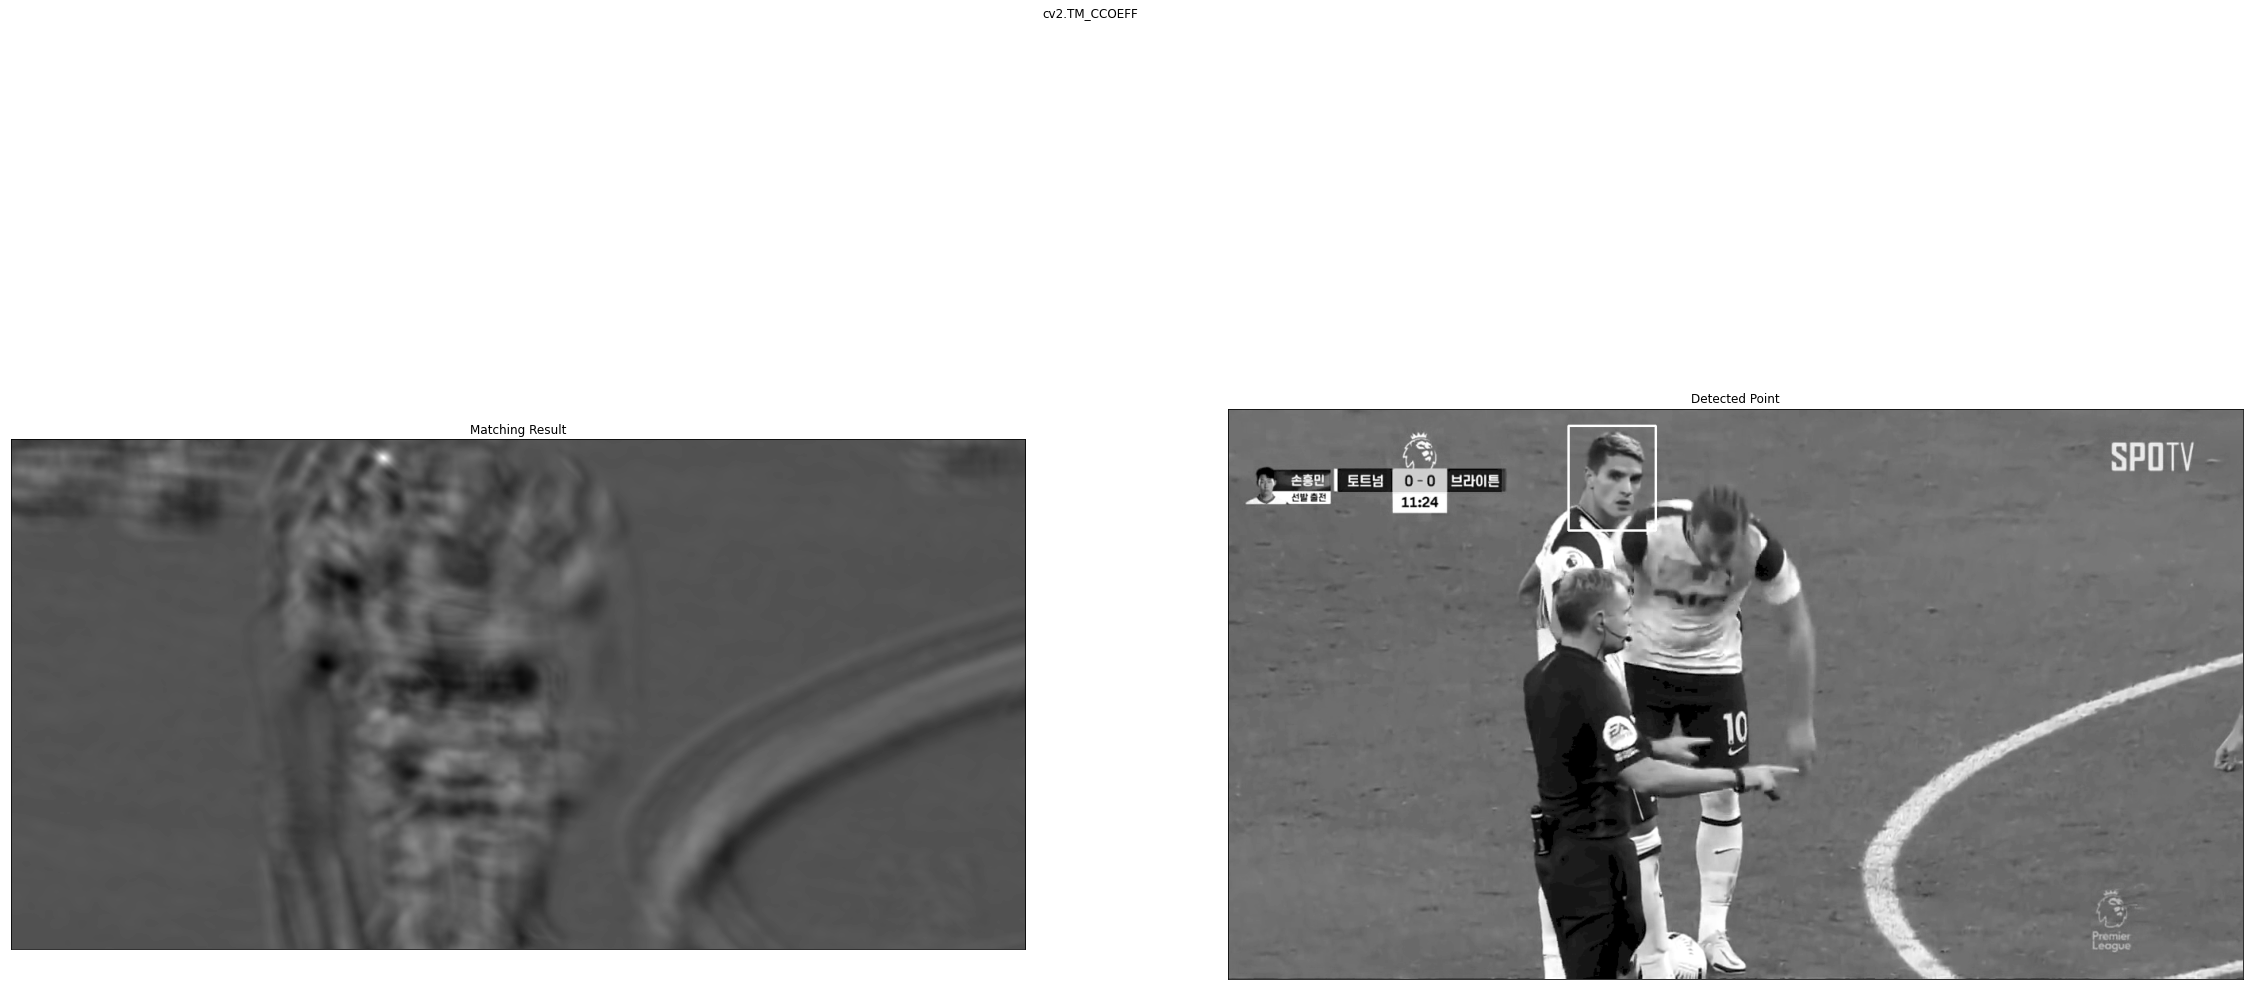

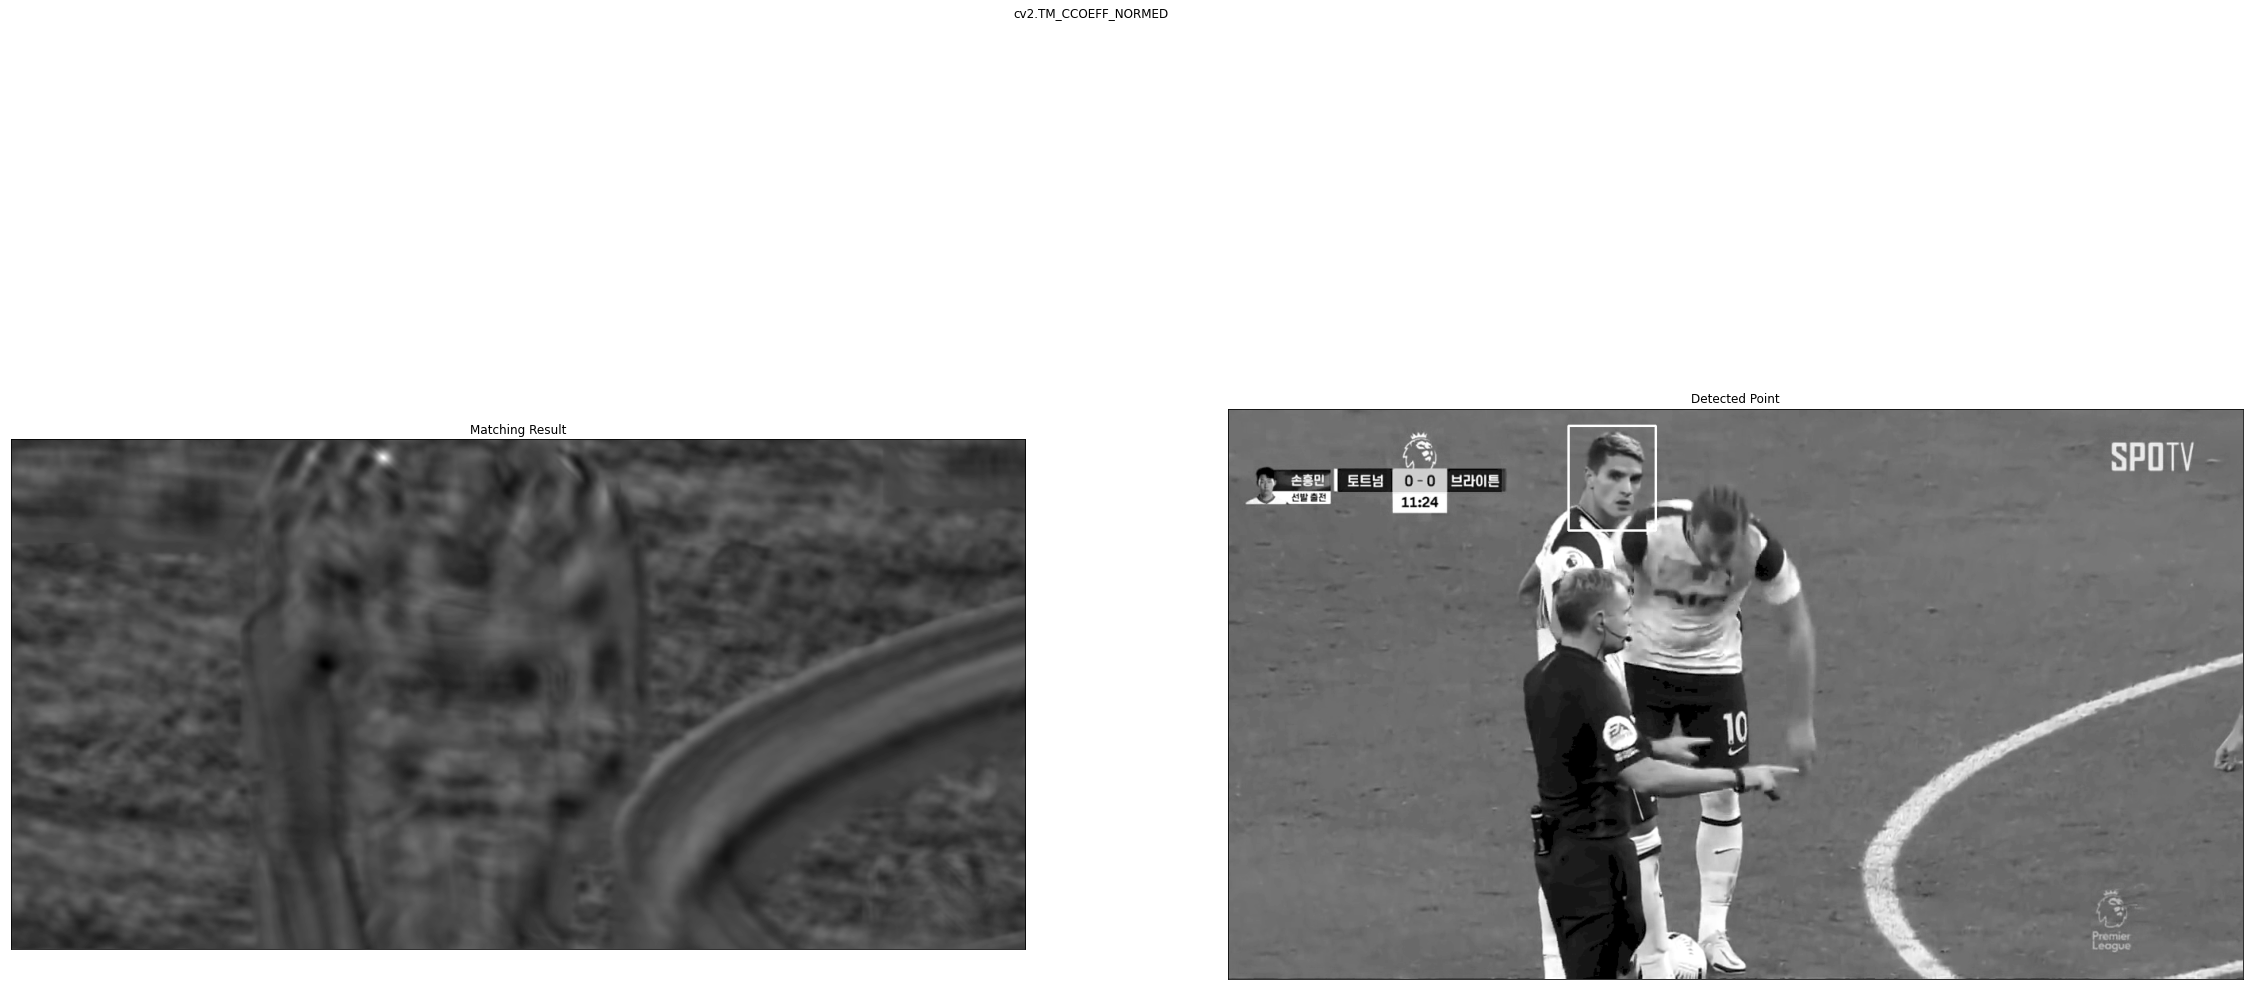

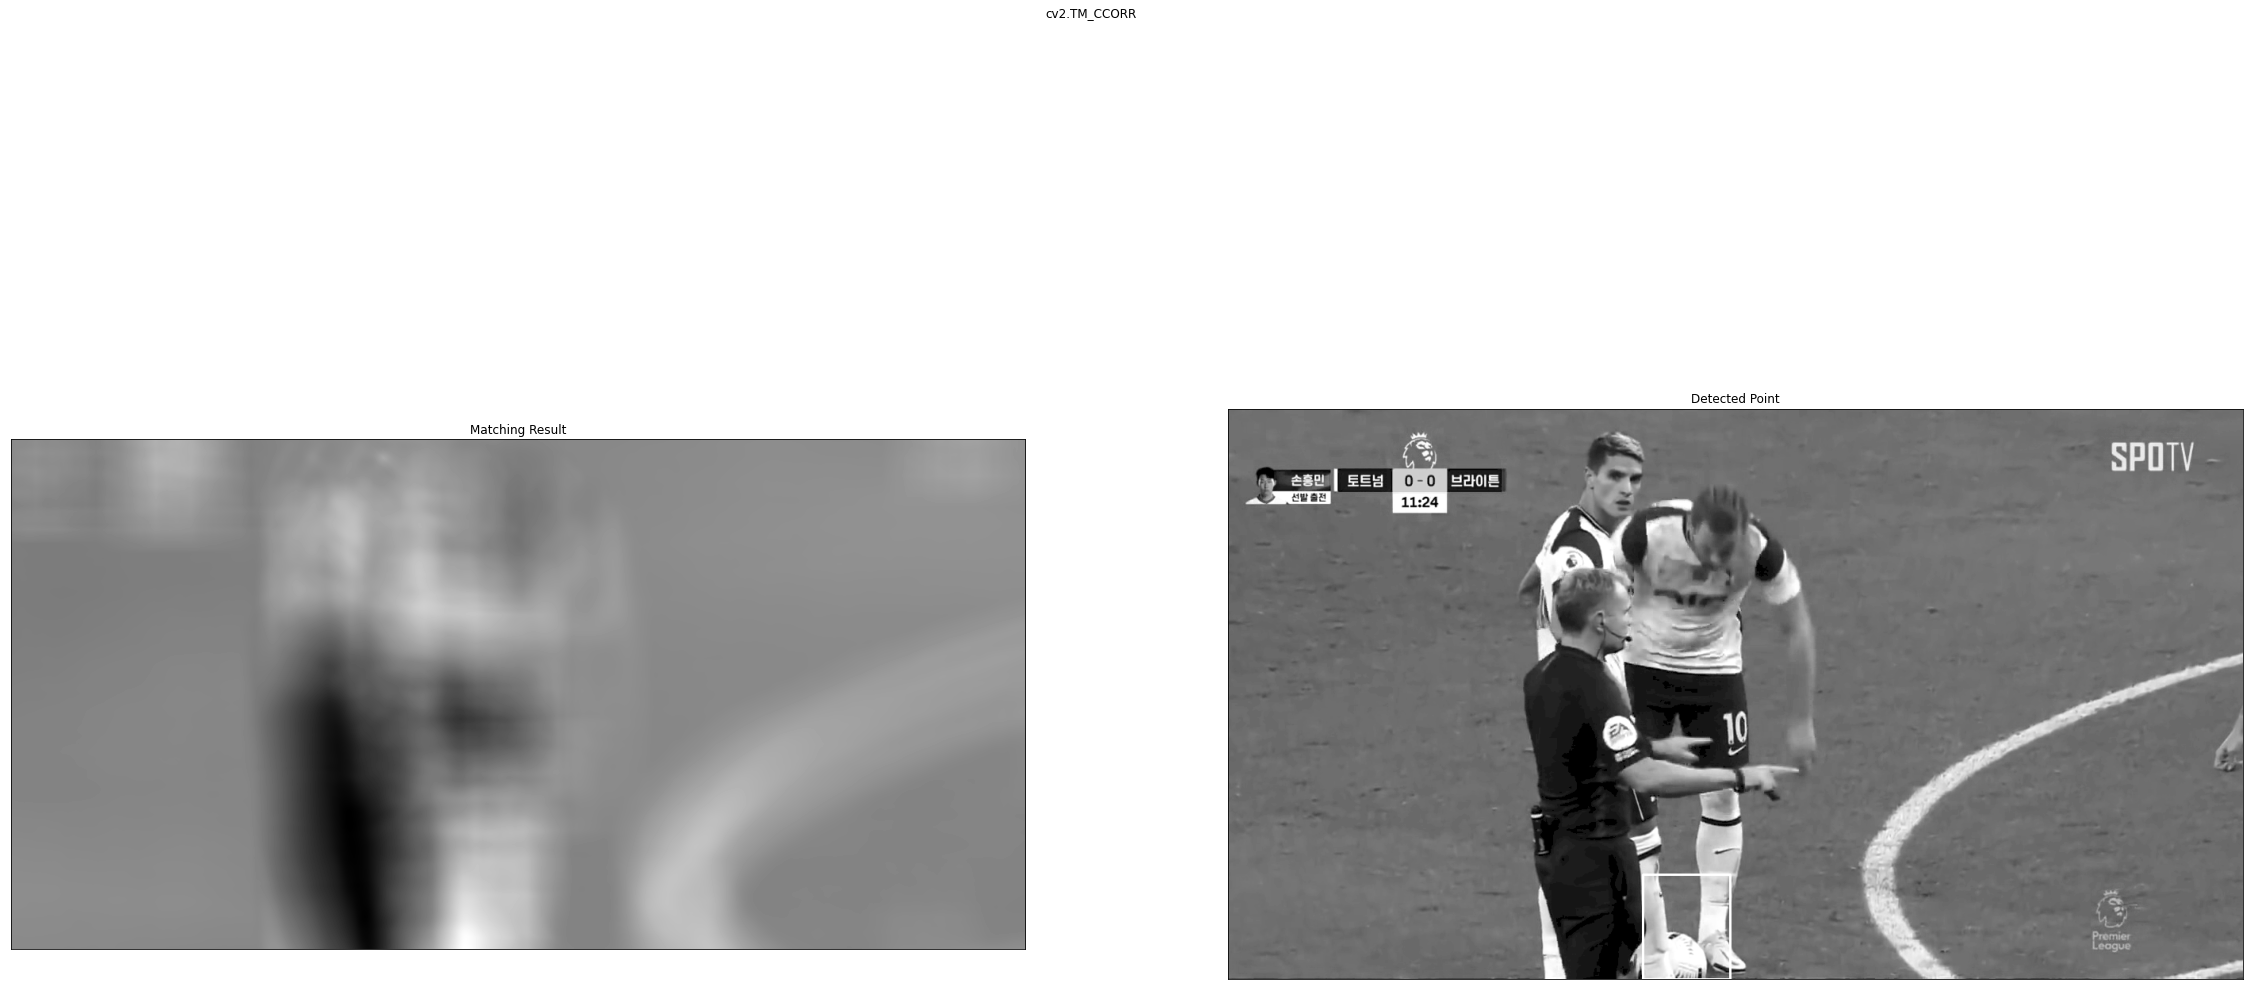

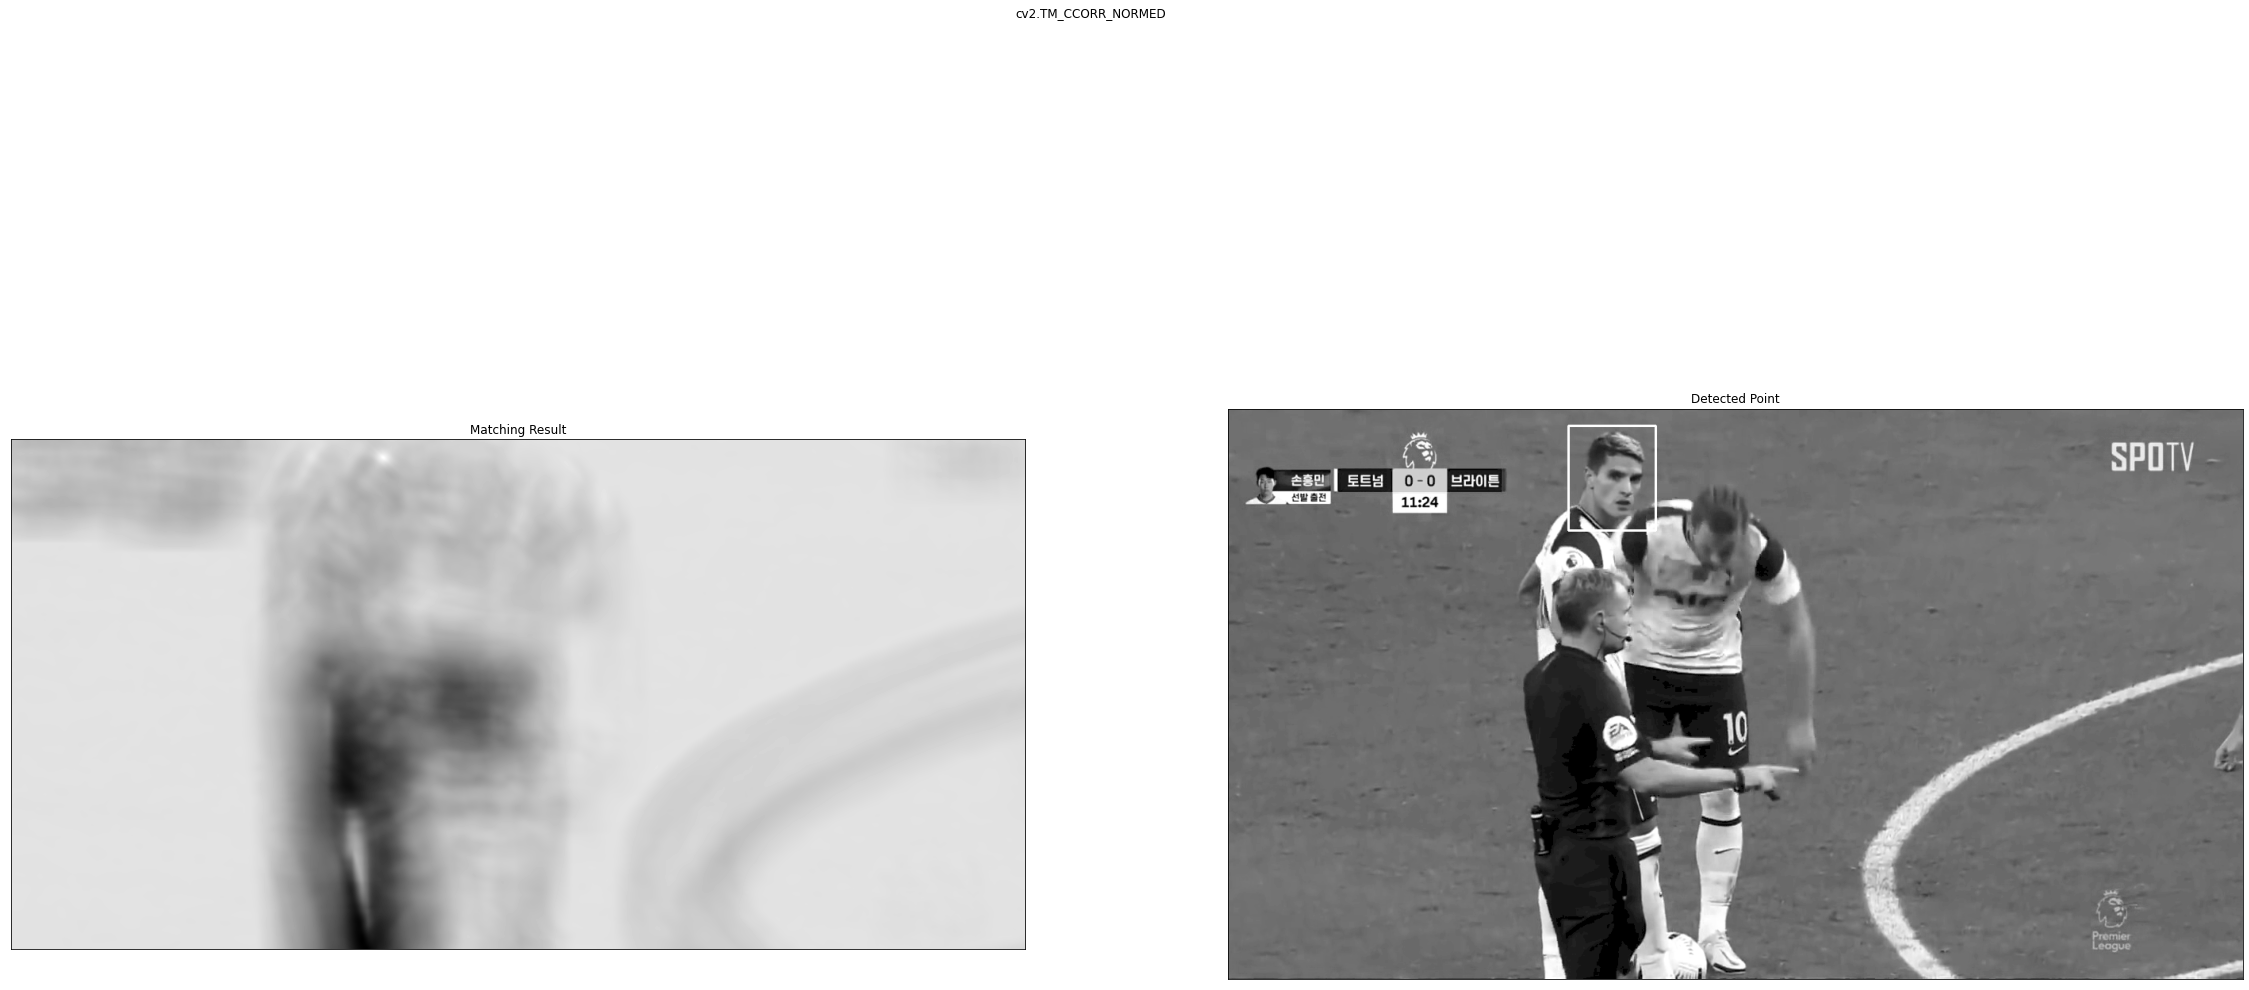

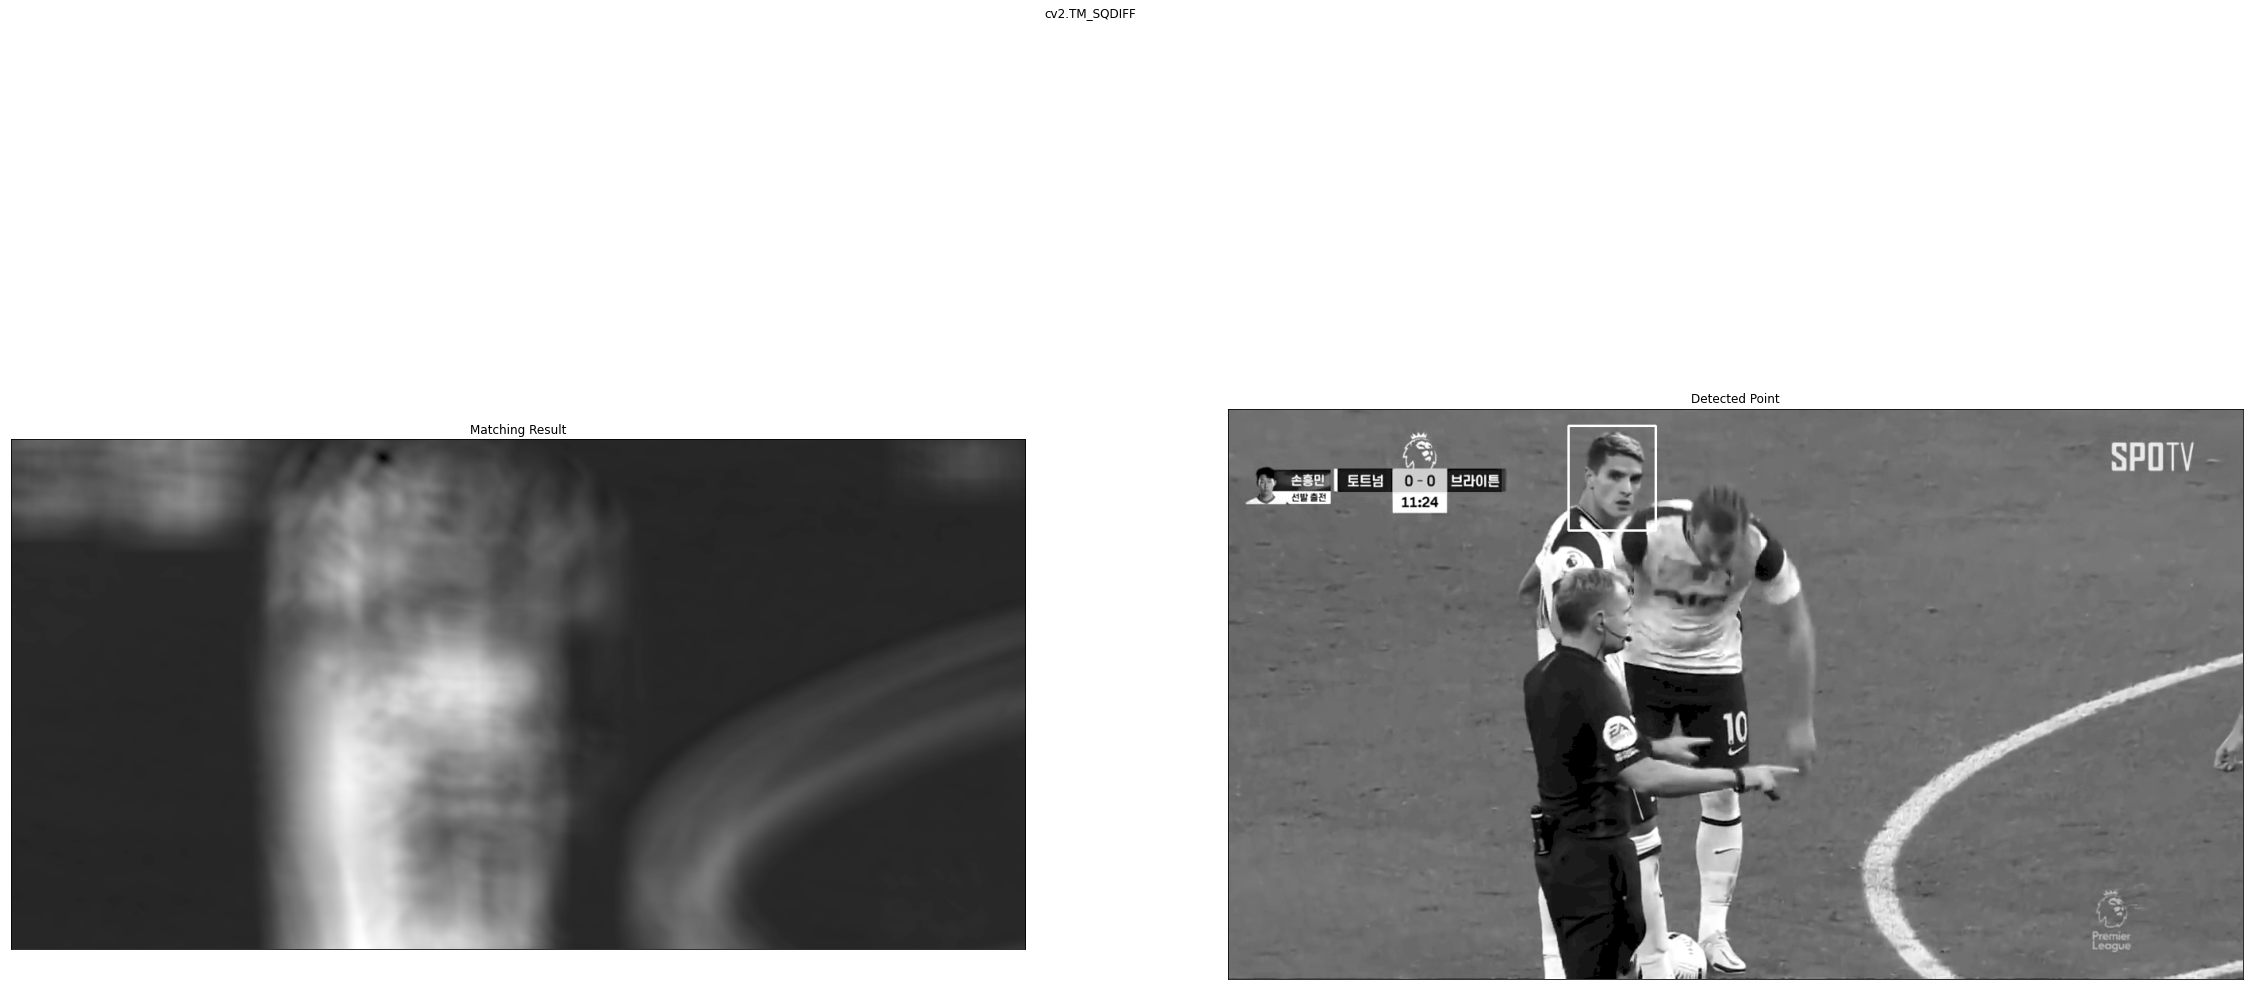

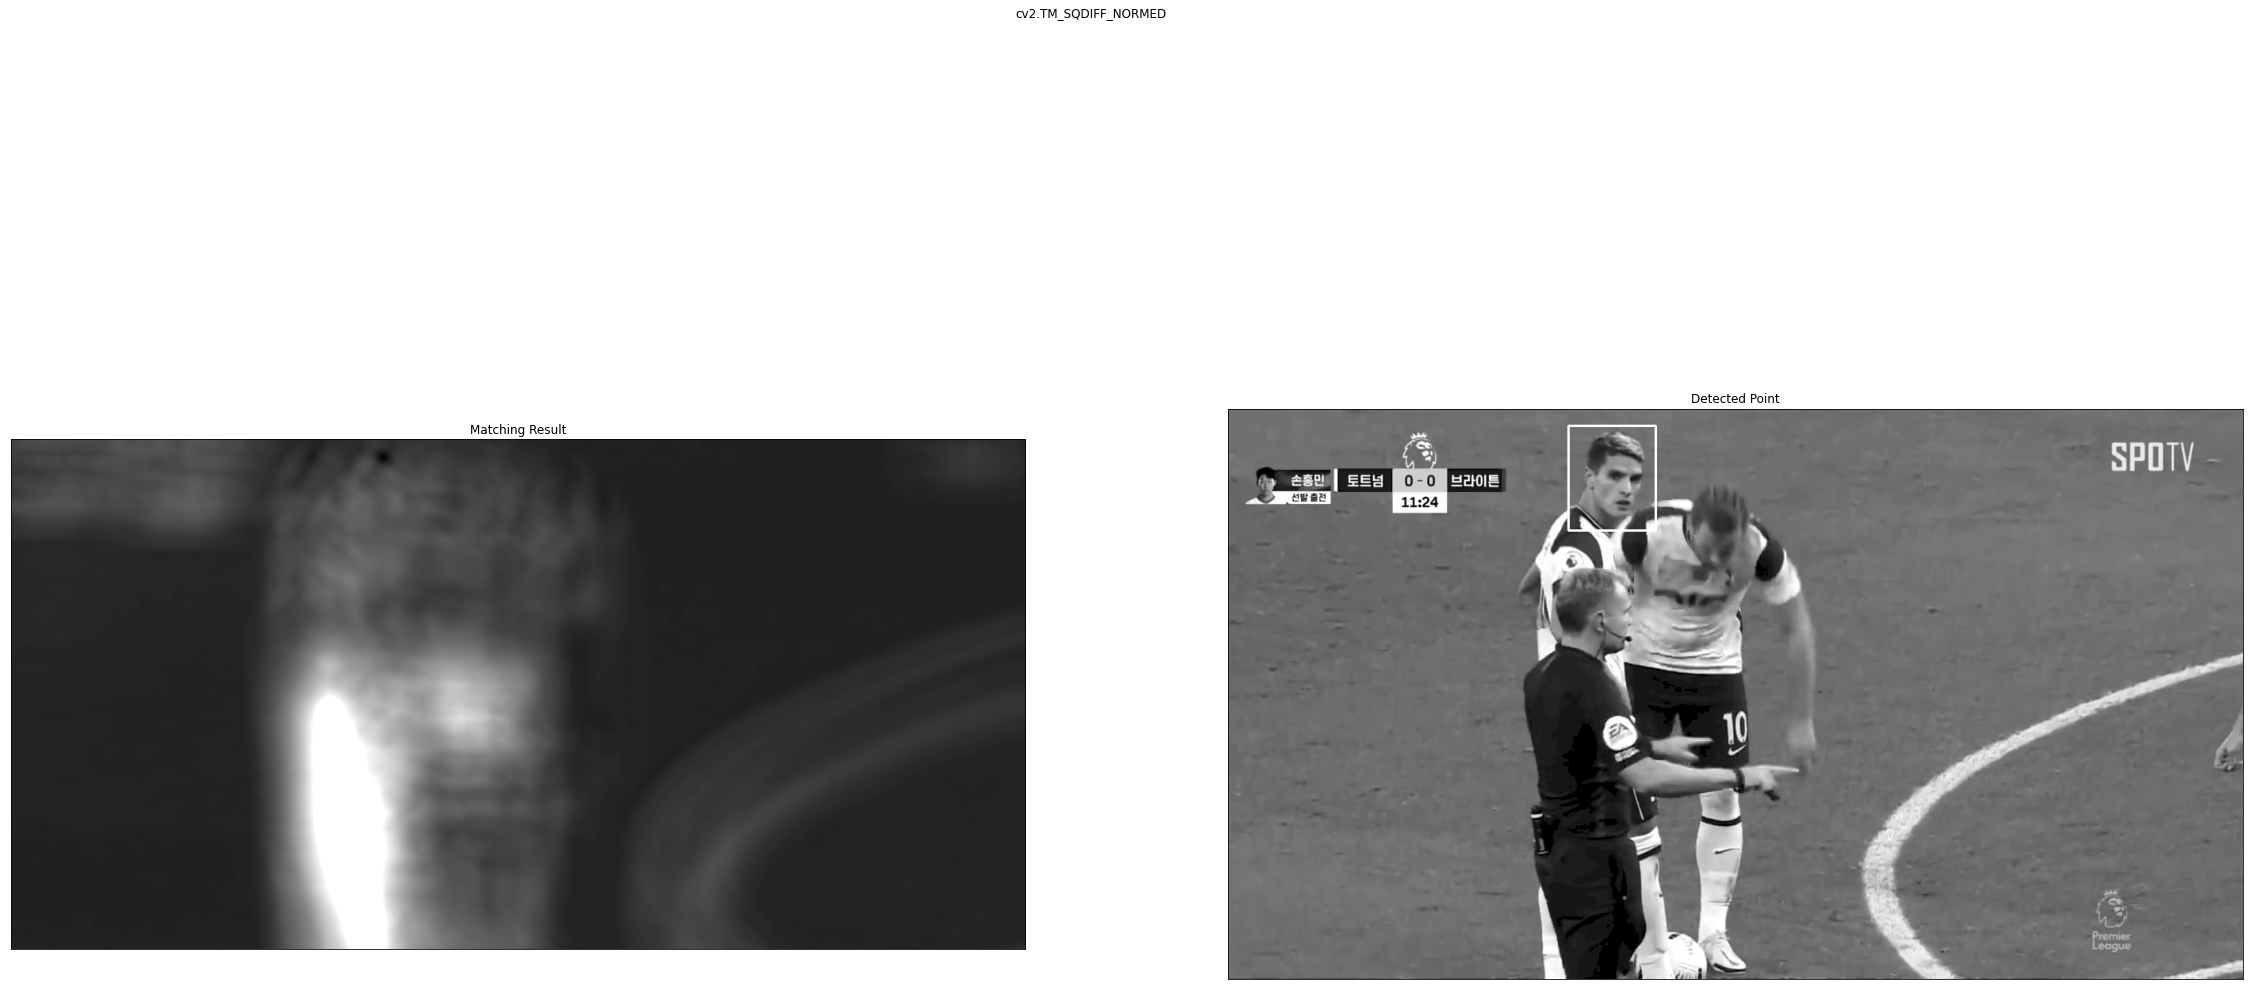

In [54]:
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.figure(figsize=(40,20))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [55]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [56]:
img_rgb = cv2.imread('mario.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('mario_coin.png',0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
print(min_val, max_val, min_loc, max_loc)

-0.45550745725631714 0.9990493655204773 (253, 225) (83, 93)


In [57]:
res=(res-min_val)/(max_val-min_val)
print(res)

[[0.26143757 0.239662   0.22127193 ... 0.26751557 0.31315893 0.31315893]
 [0.2583929  0.23600611 0.2166208  ... 0.2675284  0.31315893 0.31315893]
 [0.25527802 0.23243955 0.21222547 ... 0.26751557 0.31315893 0.31315893]
 ...
 [0.3290083  0.30157816 0.30961972 ... 0.35080767 0.344621   0.3786916 ]
 [0.34048226 0.31247646 0.32563114 ... 0.34400442 0.33736414 0.37314942]
 [0.28034386 0.2646567  0.28192547 ... 0.27577063 0.26291955 0.29581067]]


In [58]:
threshold = 0.8
loc = np.where(res >= threshold)

In [59]:
print(loc[::-1])

(array([ 82,  83,  84, 100, 101, 117, 118, 135, 136, 152, 153,  82,  83,
        84,  99, 100, 101, 102, 117, 118, 119, 134, 135, 136, 137, 152,
       153, 154,  81,  82,  83,  84,  85,  99, 100, 101, 102, 116, 117,
       118, 119, 120, 134, 135, 136, 137, 151, 152, 153, 154,  81,  82,
        83,  84,  85,  99, 100, 101, 102, 116, 117, 118, 119, 120, 134,
       135, 136, 137, 151, 152, 153, 154, 155,  81,  82,  83,  84,  85,
        99, 100, 101, 102, 116, 117, 118, 119, 120, 134, 135, 136, 137,
       151, 152, 153, 154,  82,  83,  84,  99, 100, 101, 102, 117, 118,
       119, 134, 135, 136, 137, 152, 153, 154,  82,  83,  84, 100, 101,
       117, 118, 135, 136, 152, 153,  65,  66,  82,  83,  84, 100, 101,
       117, 118, 119, 135, 136, 152, 153, 169, 170, 171,  64,  65,  66,
        67,  82,  83,  84,  99, 100, 101, 102, 117, 118, 119, 134, 135,
       136, 137, 151, 152, 153, 154, 169, 170, 171, 172,  64,  65,  66,
        67,  81,  82,  83,  84,  85,  99, 100, 101, 102, 116, 1

In [60]:
img_rgb = cv2.imread('mario.png') #mario hmson2
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,255), 1)

In [61]:
cv2.imshow('img_rgb',img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [62]:
def nothing(x):
    pass

In [ ]:
cv2.namedWindow('image')
cv2.createTrackbar('threshold', 'image', 200, 255,nothing)
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    threshold = cv2.getTrackbarPos('threshold', 'image')
    loc = np.where(res >= threshold/255.)
    img_rgb = cv2.imread('mario.png')
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_rgb, pt, (pt[0] + 5 + w , pt[1] + 25 +h), (255,0,255), 1)
    cv2.imshow('image',img_rgb)
cv2.destroyAllWindows()